In [1]:

import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd

from mlxtend.plotting import heatmap

import numpy as np

import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split

import random


In [61]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [2]:

## !pip install mlxtend


In [3]:

## XOR data


In [4]:

## nn


In [5]:


## y = w * x + b

## nn.Linear()



## First NN architecture

* MLP


In [6]:

## MLP

class MLP_Net(nn.Module):
    ## init class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear(4 , 6)
        self.linear2 = nn.Linear(6 , 3)
        
        ## define the layers
        
    ## perform the inference
    def forward(self, x):
        
        h1 = self.linear1( x  )
        y  = self.linear2( h1 )
        
        return y
        


In [7]:

model = MLP_Net()


In [8]:

x = torch.randn(1, 4)
x.shape


torch.Size([1, 4])

In [9]:

y_pred = model(  x  )


In [10]:

y_pred.shape


torch.Size([1, 3])

In [11]:

xb = torch.randn(150, 4)
xb.shape


torch.Size([150, 4])

In [12]:

y_pred_b = model(  xb  )


In [13]:

y_pred_b.shape


torch.Size([150, 3])


## Build a NN for the Iris data set


In [57]:

## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.003 ## 0.001
N_Epochs      = 4000

epsilon = 0.0001


In [14]:

path_data = 'iris.csv'

iris_raw_data = pd.read_csv(path_data, delimiter=",")


In [15]:

iris_raw_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:

iris_raw_data.species = iris_raw_data.species.map(  {'setosa':0, 'virginica':1, 'versicolor':2}   )


In [17]:

iris_raw_data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [18]:

headers_list = iris_raw_data.columns.values.tolist()
headers_list


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [19]:

cm = np.corrcoef(  iris_raw_data[ headers_list ].values.T  )


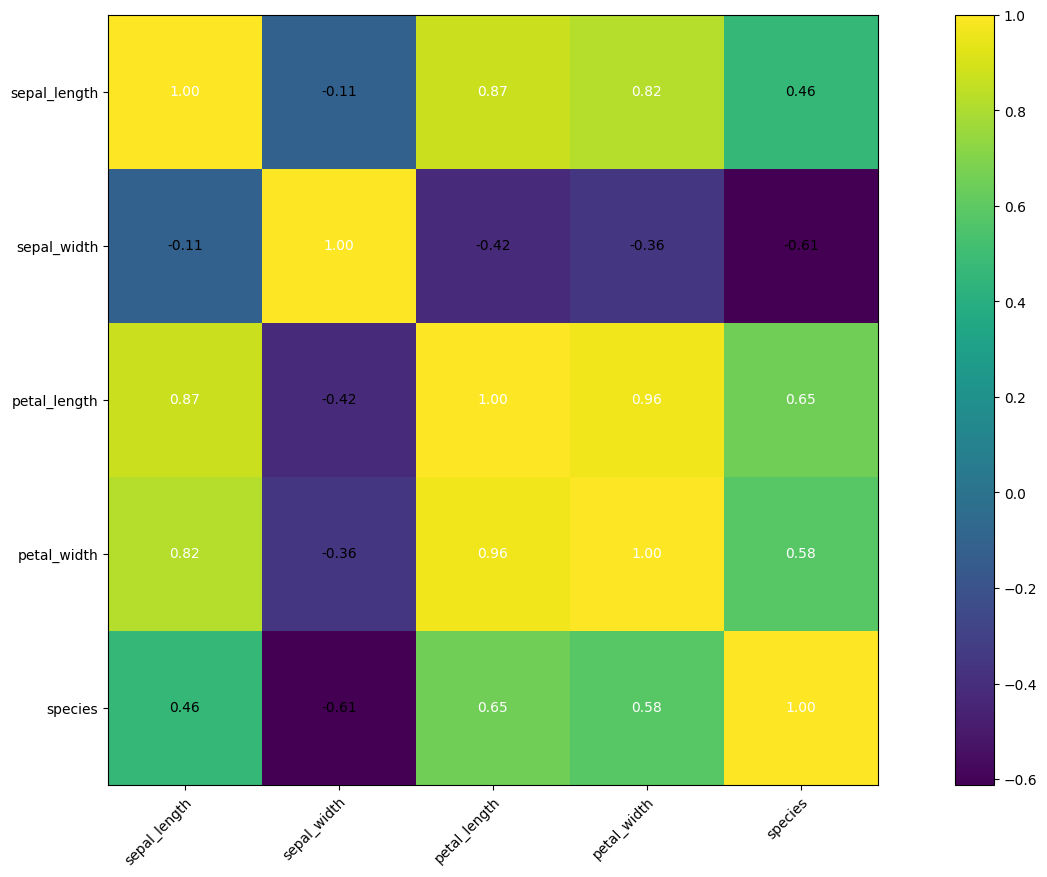

In [20]:

hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
plt.show()


In [21]:

iris_raw_data_np = iris_raw_data.to_numpy()
iris_raw_data_np


array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [22]:

iris_raw_data_np.shape


(150, 5)

In [23]:

X = iris_raw_data_np[:, :-1]

y = iris_raw_data_np[:, 4:5]


In [24]:

X.shape


(150, 4)

In [25]:

y.shape


(150, 1)

In [26]:

y


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],

In [27]:

y = y.astype(int)


In [28]:

y


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [29]:

the_set = np.unique(y)
the_set


array([0, 1, 2])

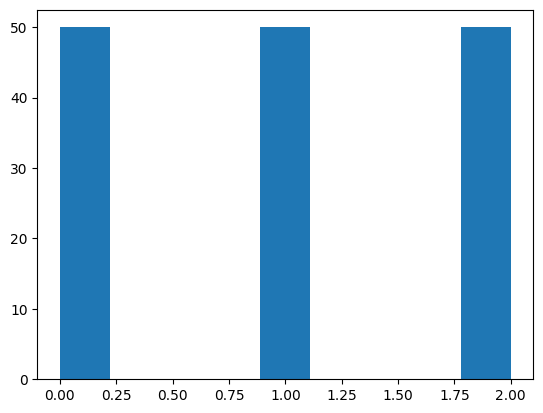

In [30]:

_ = plt.hist(  y, bins='auto'  )
plt.show()


In [31]:

random_seed = int(   random.random() * 100    )


In [32]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = random_seed)


In [33]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [34]:

X_test.dtype


dtype('float64')

In [35]:

y_test.dtype 


dtype('int32')

In [36]:

## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long  
y_test  = y_test.astype(   np.int64 )


In [37]:

X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)



## Create DataLoader


In [38]:

X_train.shape[0]


120

In [45]:

X_train_tr[3]


tensor([6.2000, 2.9000, 4.3000, 1.3000])

In [46]:

y_train_tr[3].item()


2

In [47]:



iris_train_list = [  ( X_train_tr[i],  y_train_tr[i].item()  )  for i in range( X_train.shape[0] ) ]

iris_test_list  = [  ( X_test_tr[i],   y_test_tr[i].item()   )  for i in range( X_test.shape[0]  ) ]


In [48]:

## iris_test_list  

batch_size = 16



In [49]:

train_dl = torch.utils.data.DataLoader( iris_train_list, batch_size=batch_size, shuffle=True )


In [50]:

train_dl


In [51]:

all_test_data = X_test.shape[0]

test_dl  = torch.utils.data.DataLoader(iris_test_list,  batch_size=all_test_data, shuffle=True)


In [52]:

## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
    
        self.linear1 = nn.Linear(4, 5)
        
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(5, 3)
        self.act2    = nn.Softmax(dim=1)

        
        
    ## perform inference
    def forward(self, x):
        

        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)
        
        return y_pred
        


In [53]:

## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        

        
        self.linear1 = nn.Linear(4, 15)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(15, 9)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(9, 3)
        self.act3    = nn.Softmax(dim=1)
  
        
    ## perform inference
    def forward(self, x):
        
  
        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.linear2(x)
        x      = self.act2(x)

        x      = self.linear3(x)
        y_pred = self.act3(x)
        
        return y_pred



## Training Loop


In [54]:

def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            ## yb = torch.squeeze(yb, dim=1)
            
            y_pred = model(xb)
            ## print(    yb.shape   )
            ## print( y_pred.shape  )
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 50 == 0:
            print(epoch, "loss=", loss)
            



## Core Functions for MLP


In [58]:

model      = MLP_Net()
## model      = DL_Net(  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )   

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(1.0910, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.7686, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.6812, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.6437, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.6407, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.5878, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.5679, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.5759, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.6022, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.5720, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.5663, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.5909, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.5593, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.6303, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.5536, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.5569, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.5682, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.5736, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.5527, grad_fn=<NllLossBackward

In [59]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [62]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)
   


Accuracy: 0.93
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Precision: 0.944
Recall: 0.933
F1-measure: 0.933



## Core Functions for Deep Learning


In [64]:

model      = DL_Net(  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )   

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(1.1372, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.5595, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.5817, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.5516, grad_fn=<NllLossBackward0>)
200 loss= tensor(0.5516, grad_fn=<NllLossBackward0>)
250 loss= tensor(0.5522, grad_fn=<NllLossBackward0>)
300 loss= tensor(0.5838, grad_fn=<NllLossBackward0>)
350 loss= tensor(0.5528, grad_fn=<NllLossBackward0>)
400 loss= tensor(0.5524, grad_fn=<NllLossBackward0>)
450 loss= tensor(0.5517, grad_fn=<NllLossBackward0>)
500 loss= tensor(0.5931, grad_fn=<NllLossBackward0>)
550 loss= tensor(0.5638, grad_fn=<NllLossBackward0>)
600 loss= tensor(0.5529, grad_fn=<NllLossBackward0>)
650 loss= tensor(0.5516, grad_fn=<NllLossBackward0>)
700 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
750 loss= tensor(0.5525, grad_fn=<NllLossBackward0>)
800 loss= tensor(0.5675, grad_fn=<NllLossBackward0>)
850 loss= tensor(0.5515, grad_fn=<NllLossBackward0>)
900 loss= tensor(0.6047, grad_fn=<NllLossBackward

In [65]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)
   


Accuracy: 0.97
Confusion Matrix:
[[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]
Precision: 0.969
Recall: 0.967
F1-measure: 0.967
